<a href="https://colab.research.google.com/github/larislima11/data-mining/blob/main/223201_DataMining_AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Erro Quadrático Médio (RMSE): 0.2082181374194002


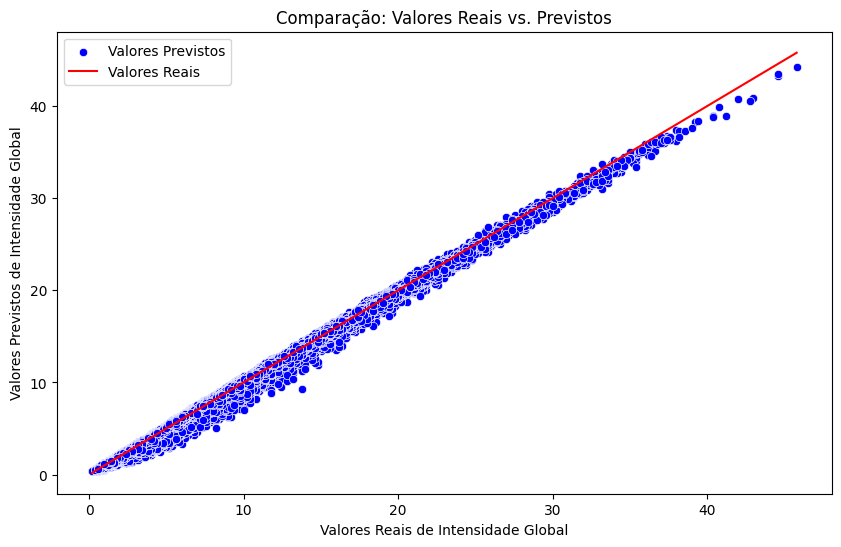

O gráfico acima mostra a comparação entre os valores reais e os valores previstos pelo modelo de Regressão Linear para a Intensidade Global.
             antecedents           consequents  support  confidence      lift
0                 [Male]         [Adolescente]    0.015    0.034091  1.704545
1          [Adolescente]                [Male]    0.015    0.750000  1.704545
2          [Média Renda]         [Adolescente]    0.015    0.039474  1.973684
3          [Adolescente]         [Média Renda]    0.015    0.750000  1.973684
4           [Alta Renda]              [Adulto]    0.140    0.378378  1.220575
..                   ...                   ...      ...         ...       ...
79  [Idoso, Média Renda]                [Male]    0.070    0.560000  1.272727
80   [Male, Média Renda]               [Idoso]    0.070    0.424242  2.121212
81               [Idoso]   [Male, Média Renda]    0.070    0.350000  2.121212
82                [Male]  [Idoso, Média Renda]    0.070    0.159091  1.272727
8

<ipython-input-12-916e1c80cf2d>:55: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: list(x) if isinstance(x, frozenset) else x))


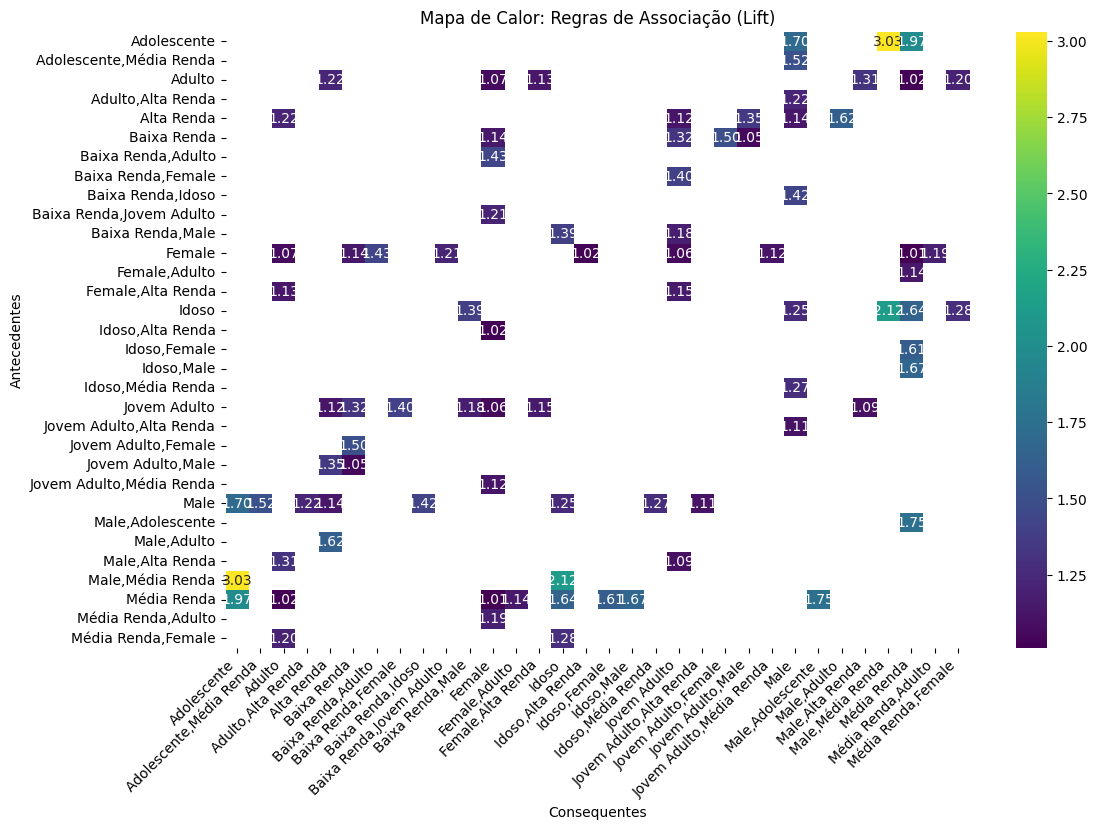

O mapa de calor acima representa as regras de associação entre diferentes atributos com base no coeficiente Lift. Valores mais altos indicam associações mais fortes.


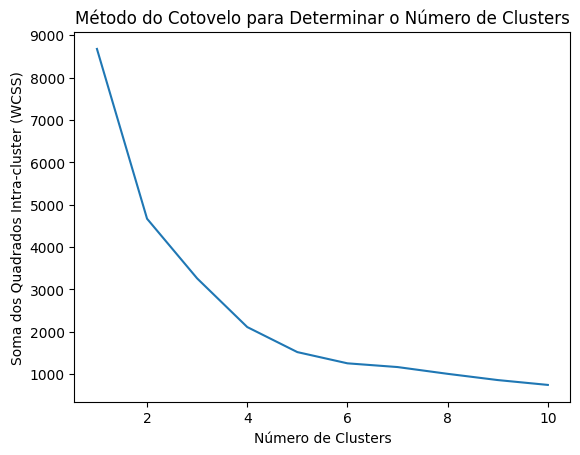

O gráfico do Método do Cotovelo ajuda a determinar o número ideal de clusters para o algoritmo K-Means. O ponto de inflexão no gráfico indica o número recomendado de clusters.


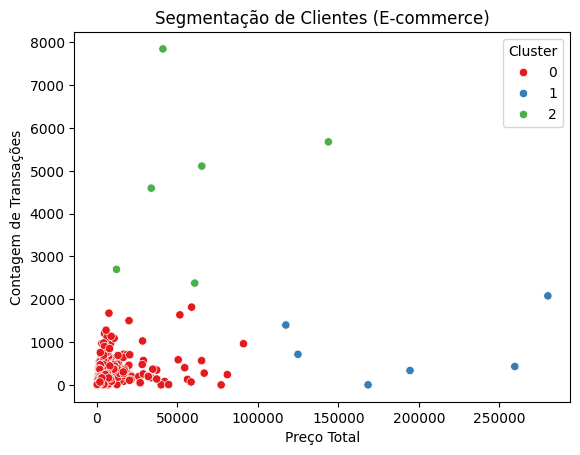

O gráfico de dispersão acima mostra a segmentação de clientes com base no gasto total e na quantidade de transações, agrupados em clusters.
Acurácia do Modelo: 0.7207792207792207
Matriz de Confusão:
 [[77 22]
 [21 34]]


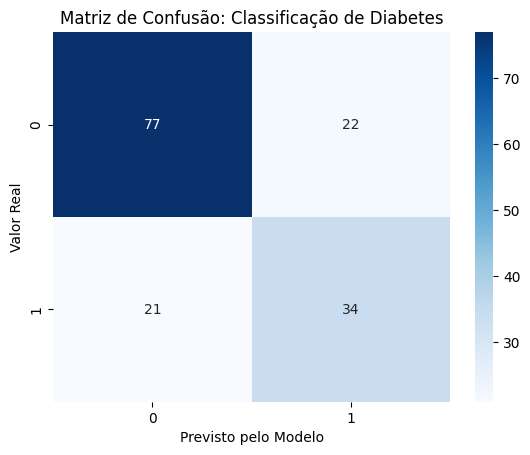

A matriz de confusão acima mostra o desempenho do modelo Random Forest na classificação de diabetes, indicando verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Carregando e processando dados
household_df = pd.read_csv('household_power_consumption.txt', sep=';', na_values='?')
household_df['Date'] = pd.to_datetime(household_df['Date'], format='%d/%m/%Y')
household_df['Month'] = household_df['Date'].dt.month
household_df['Hour'] = pd.to_datetime(household_df['Time'], format='%H:%M:%S').dt.hour
household_df = household_df.dropna()

# Preparação para Regressão Linear
x = household_df[['Global_active_power', 'Month', 'Hour']]
y = household_df['Global_intensity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Erro Quadrático Médio (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

# Gráfico de Regressão Linear
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Valores Previstos')
sns.lineplot(x=y_test, y=y_test, color='red', label='Valores Reais')
plt.xlabel('Valores Reais de Intensidade Global')
plt.ylabel('Valores Previstos de Intensidade Global')
plt.title('Comparação: Valores Reais vs. Previstos')
plt.legend()
plt.show()

# Texto explicativo para o gráfico de Regressão Linear
print("O gráfico acima mostra a comparação entre os valores reais e os valores previstos pelo modelo de Regressão Linear para a Intensidade Global.")

# Apriori e Regras de Associação
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

mall_df = pd.read_csv('Mall_Customers.csv')
mall_df['Age_Group'] = pd.cut(mall_df['Age'], bins=[0, 18, 35, 50, 100], labels=['Adolescente', 'Jovem Adulto', 'Adulto', 'Idoso'])
mall_df['Income_Group'] = pd.cut(mall_df['Annual Income (k$)'], bins=[0, 40, 70, 150], labels=['Baixa Renda', 'Média Renda', 'Alta Renda'])
transactions = mall_df[['Age_Group', 'Genre', 'Income_Group']].apply(lambda x: [str(i) for i in x], axis=1).tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0, num_itemsets=2)

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
      .applymap(lambda x: list(x) if isinstance(x, frozenset) else x))

plt.figure(figsize=(12, 8))
sns.heatmap(rules.pivot_table(index=rules['antecedents'].apply(lambda x: ','.join(list(x))),
                              columns=rules['consequents'].apply(lambda x: ','.join(list(x))),
                              values='lift'),
            annot=True, cmap='viridis', fmt='.2f')
plt.title('Mapa de Calor: Regras de Associação (Lift)')
plt.xlabel('Consequentes')
plt.ylabel('Antecedentes')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Texto explicativo para o Mapa de Calor
print("O mapa de calor acima representa as regras de associação entre diferentes atributos com base no coeficiente Lift. Valores mais altos indicam associações mais fortes.")

# Segmentação de Clientes com K-Means
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data_df = pd.read_csv('data.csv', encoding='ISO-8859-1')
data_df = data_df.dropna()
data_df = data_df[data_df['Quantity'] > 0]
data_df['TotalPrice'] = data_df['Quantity'] * data_df['UnitPrice']
customer_data = data_df.groupby('CustomerID').agg({'TotalPrice': 'sum', 'InvoiceNo': 'count'}).reset_index()
customer_data.rename(columns={'InvoiceNo': 'TransactionCount'}, inplace=True)

scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['TotalPrice', 'TransactionCount']])

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados Intra-cluster (WCSS)')
plt.title('Método do Cotovelo para Determinar o Número de Clusters')
plt.show()

# Texto explicativo para o Método do Cotovelo
print("O gráfico do Método do Cotovelo ajuda a determinar o número ideal de clusters para o algoritmo K-Means. O ponto de inflexão no gráfico indica o número recomendado de clusters.")

kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

sns.scatterplot(x='TotalPrice', y='TransactionCount', hue='Cluster', data=customer_data, palette='Set1')
plt.title('Segmentação de Clientes (E-commerce)')
plt.xlabel('Preço Total')
plt.ylabel('Contagem de Transações')
plt.show()

# Texto explicativo para a Segmentação de Clientes
print("O gráfico de dispersão acima mostra a segmentação de clientes com base no gasto total e na quantidade de transações, agrupados em clusters.")

# Classificação com Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

diabetes_df = pd.read_csv('diabetes.csv')
x = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Acurácia do Modelo:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão: Classificação de Diabetes')
plt.xlabel('Previsto pelo Modelo')
plt.ylabel('Valor Real')
plt.show()

# Texto explicativo para a Matriz de Confusão
print("A matriz de confusão acima mostra o desempenho do modelo Random Forest na classificação de diabetes, indicando verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.")

